# TITANIC DATASET FOR Explanatory Data Analysis

In [ ]:
import numpy as np
import pandas as pd

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns', None)

In [12]:
!pip install plotly --upgrade

In [13]:
df=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/titanic_train.csv")

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
df.PassengerId.nunique()

891

In [17]:
for i in df:
    print (i,":", df[i].nunique())

PassengerId : 891
Survived : 2
Pclass : 3
Name : 891
Sex : 2
Age : 88
SibSp : 7
Parch : 7
Ticket : 681
Fare : 248
Cabin : 147
Embarked : 3


In [18]:
df[df.duplicated()].count()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

 #  Find out if there are any duplicate entries in the dataset

In [19]:
df[df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


##### We can there are no duplicate rows in the dataset

#  Calculation of total missing value with the percentage

In [43]:
def miss_values():
    total=df.isnull().sum().sort_values(ascending=False)
    percentage_null=df.isnull().sum()/(df.isnull().count()*100).sort_values(ascending=False)
    missing_data=pd.concat([total,percentage_null],axis=1, keys=['total','percentage_null'])
    return missing_data
miss_values()


,total,percentage_null
Cabin,687,0.007710
Age,177,0.001987
Embarked,2,0.000022
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


### Obersavtions:
#### 1. We have 687 missing values in cabin. But since they are not very much relevant to our analysis. They can be ignored.
#### 2. There are 177 missing values in Age. We will replace it with median.
#### 3. There are 2 missing values in Embarked. We will replace it with mode.

In [ ]:
df.describe()

### Filling up the missing values in Age

In [ ]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [ ]:
df['Age'].isna().sum()


### Filling up the missing values in Embarked

In [ ]:
df['Embarked'].value_counts()


In [ ]:
df['Embarked'].mode()

In [ ]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
df['Embarked'].isna().sum()

In [ ]:
df['Survived']=df['Survived'].astype(str)

In [ ]:
isinstance(df['Survived'],object)

In [ ]:
df.info()

In [44]:
df['Survived']=df['Survived'].replace('0','died')
df['Survived']=df['Survived'].replace('1','survived')

In [ ]:
df.head()

# 1. Age distibution of the passengers who boarded Titanic 

In [ ]:
df['Age'].hist(bins=10, figsize=(10,7),grid=False,color='green')
plt.title("Age Distibution")


##### Obersvations:
##### Most of the people who boarded Titanic are in the Age group of 20-30

# 2.Classifying age group to understand the survival percentage of adults and children


In [ ]:
df.loc[(df.Age<=18),  'AgeGroup'] = 'Child'
df.loc[(df.Age>=18),  'AgeGroup'] = 'Adult'         

In [ ]:
df['AgeGroup'].value_counts()

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
ax=sns.countplot(data=df,x='AgeGroup',hue='Survived')
plt.title('Survival study of adults and children')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.subplot(1,2,2)
plt.title('Agegroup classification of Passengers')
df['AgeGroup'].value_counts().plot(kind='pie', explode=[0.05,0.05], fontsize=14, autopct='%3.1f%%',shadow=True, startangle=135, legend=True, cmap='summer')
df['AgeGroup'].value_counts()

In [ ]:
q5=df[(df['Survived']=='survived')].groupby('AgeGroup').count()['Survived']
q5

In [ ]:
q6=df[(df['Survived']=='died')].groupby('AgeGroup').count()['Survived']
q6

#### Observations:

In [ ]:
s=pd.concat([q5,q6], axis=1,keys=['survived','died'])
s

# 3. Classifying gender to understand the survival percentage of males and females

In [ ]:
df.Sex.value_counts()

In [ ]:
df[(df['Survived']=='survived')]['Sex'].value_counts()

In [ ]:
q2=df[(df['Survived']=='survived')].groupby('Sex').count()['Survived']
q2

In [ ]:
q3=df[(df['Survived']=='died')].groupby('Sex').count()['Survived']
q3

#### Observations:
##### We can say that survival preference was given to female passengers.

In [ ]:
r2=pd.concat([q2,q3],axis=1,keys=['survived','died'])
r2

In [ ]:
ax=sns.countplot(data=df,x='Sex',hue='Survived')
plt.title("Survival study of male and female")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

# 4. Checking the relationship between Embarked and Survival

In [ ]:
df['Embarked'].value_counts()

In [ ]:
a=df[(df['Embarked']=="S")].groupby('Survived').count()['Embarked']
a

In [ ]:
b=df[(df['Embarked']=="C")].groupby('Survived').count()['Embarked']
b

In [ ]:
c=df[(df['Embarked']=="Q")].groupby('Survived').count()['Embarked']
c

In [ ]:
s2=pd.concat([a,b,c],axis=1,keys=['S','C','Q'])
s2

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("Survival status with respect to Embarked")
ax=sns.countplot(data=df, x='Embarked',hue='Survived')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.subplot(1,2,2)
plt.title("Classification of passengers based on Embarked")
df['Embarked'].value_counts().plot(kind='pie', explode=[0.05,0.05,0.05], fontsize=14, autopct='%3.1f%%',shadow=True, startangle=135, legend=True, cmap='summer')

#### Observations:
####  We can conlclude that most of the passengers were on class 'S' and that Class S has had many deaths


# 5. Let's try To see the relationship between Fare and Survival

In [ ]:
df.Fare.value_counts()

In [ ]:
df.describe()

In [ ]:
(df['Fare']==0).sum()

In [ ]:
sns.boxplot(df['Fare'])

#### We can see there are many Outliers in the Fare variable. Let's detect and treat them using Interquartile range.

In [25]:
percentile_25=df['Fare'].quantile(0.25)
percentile_75=df['Fare'].quantile(0.75)

In [26]:
iqr=percentile_75-percentile_25

In [27]:
upper_limit=percentile_75+(1.5*iqr)
lower_limit=percentile_25-(1.5*iqr)

In [28]:
#Finding outliers
df[df['Fare']>upper_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S


In [29]:
#Finding outliers
df[df['Fare']<lower_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [30]:
new_df=df[df['Fare']<upper_limit]
new_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot:xlabel='Fare'>

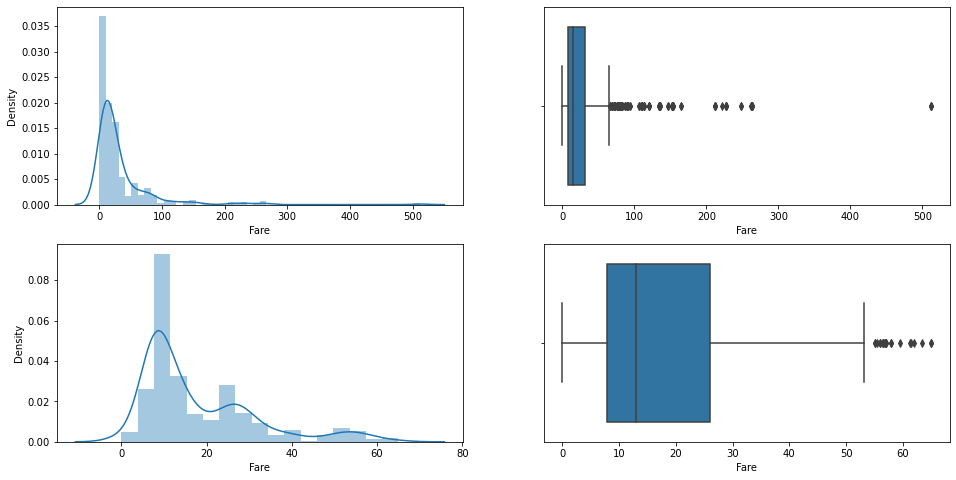

In [31]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Fare'])
plt.subplot(2,2,2)
sns.boxplot(df['Fare'])
plt.subplot(2,2,3)
sns.distplot(new_df['Fare'])
plt.subplot(2,2,4)
sns.boxplot(new_df['Fare'])

In [32]:
new_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,775.000000,775.000000,775.00000,613.000000,775.000000,775.000000,775.000000
mean,445.806452,0.339355,2.48000,28.946574,0.437419,0.340645,17.822091
std,260.116285,0.473796,0.73439,14.368139,0.899838,0.785914,13.578085
min,1.000000,0.000000,1.00000,0.420000,0.000000,0.000000,0.000000
25%,213.500000,0.000000,2.00000,20.000000,0.000000,0.000000,7.895800
50%,450.000000,0.000000,3.00000,28.000000,0.000000,0.000000,13.000000
75%,670.500000,1.000000,3.00000,37.000000,1.000000,0.000000,26.000000
max,891.000000,1.000000,3.00000,80.000000,5.000000,6.000000,65.000000


In [33]:
new_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [34]:
new_df['Fare_group']=pd.cut(new_df['Fare'],[0,20,40,60,80], labels=['<20', '20-40','4-60','60+'], include_lowest=True)

In [35]:
q11=new_df[(new_df['Survived']=="survived")].groupby('Fare_group').count()['Survived']
q11

Fare_group
<20      0
20-40    0
4-60     0
60+      0
Name: Survived, dtype: int64

In [36]:
q12=new_df[(new_df['Survived']=="died")].groupby('Fare_group').count()['Survived']
q12

Fare_group
<20      0
20-40    0
4-60     0
60+      0
Name: Survived, dtype: int64

In [37]:
s4=pd.concat([q11,q12],axis=1,keys=['survived','died'])
s4

,survived,died
Fare_group,,
<20,0,0
20-40,0,0
4-60,0,0
60+,0,0


In [38]:
new_df['Fare_group']=pd.cut(new_df['Fare'],[0,20,40,60,80], labels=['<20', '20-40','4-60','60+'], include_lowest=True)

[Text(0, 0, '143'), Text(0, 0, '86'), Text(0, 0, '31'), Text(0, 0, '3')]

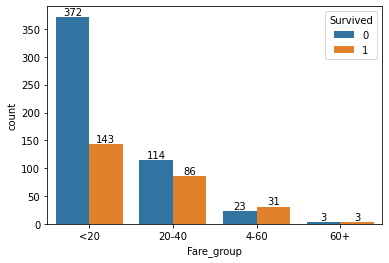

In [39]:
ax=sns.countplot(data=new_df, x='Fare_group', hue='Survived')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

#### Observation: Looks like passengers with higher fares were given first priority for survival

# Overall calculation of passengers survival status

In [40]:
df.groupby('Survived').count()['PassengerId']

Survived
0    549
1    342
Name: PassengerId, dtype: int64

<AxesSubplot:title={'center':'Overall survival and death percentage'}, ylabel='Survived'>

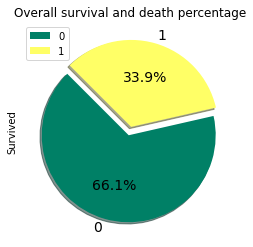

In [41]:
plt.title("Overall survival and death percentage")
new_df['Survived'].value_counts().plot(kind='pie', explode=[0.05,0.05], fontsize=14, autopct='%3.1f%%',shadow=True, startangle=135, legend=True, cmap='summer')

#### Insights:
###### 1.  People who boarded on Titanic have agaes in the range from 0 to 80. 
###### 2.  Out of the 778 adults and 113 children on Titanic,  281 adults and 61 children have survived.
###### 3.  Around 73%  of passengers belonged to Embarked class 'S' and  most of them could not survive.
###### 4. Passengers with higher fares were given first priority for survival. This could also be based upon the allocation of cabins/room that may be closer for rescue.
###### 5. 66% of  passenger lost their lives in the Titanic mishap and 40% survived